In [1]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


In [2]:
def draw_curve(path):
    root = "/storage/pandaman/project/AgentBind-Simulation/"
    motif_list_auc = []
    for line in open("/storage/pandaman/project/AgentBind-Simulation/"+path+"motif_pos_for_auc.txt"):
        motif_list_auc.append(float(line))
    ranks_list_auc = []
    for line in open(path+"ranks_for_auc.txt"):
        ranks_list_auc.append(float(line))
    
    auc_value = roc_auc_score(motif_list_auc, ranks_list_auc)
    print ("%s :: auc val - %f" %(path, auc_value))
    fpr, tpr, thresholds = roc_curve(motif_list_auc, ranks_list_auc)
    return fpr, tpr

results_new/gcam/c/simulated-TAL1/ :: auc val - 0.978532
results_new/reg/c/simulated-TAL1/ :: auc val - 0.961744
results_new/prtb/c/simulated-TAL1/ :: auc val - 0.985986
results_deepsea/gcam/c/simulated-TAL1/ :: auc val - 0.896516
results_deepsea/reg/c/simulated-TAL1/ :: auc val - 0.870733
results_deepsea/prtb/c/simulated-TAL1/ :: auc val - 0.893279
results/deeplift/c/rescale_conv_revealcancel_fc/ :: auc val - 0.811476


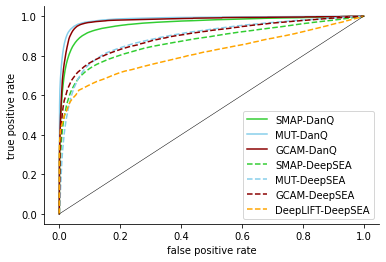

In [3]:
fpr_gcam, tpr_gcam = draw_curve("results_new/gcam/c/simulated-TAL1/")
fpr_reg, tpr_reg = draw_curve("results_new/reg/c/simulated-TAL1/")
fpr_prtb, tpr_prtb = draw_curve("results_new/prtb/c/simulated-TAL1/")
fpr_gcam_ds, tpr_gcam_ds = draw_curve("results_deepsea/gcam/c/simulated-TAL1/")
fpr_reg_ds, tpr_reg_ds = draw_curve("results_deepsea/reg/c/simulated-TAL1/")
fpr_prtb_ds, tpr_prtb_ds = draw_curve("results_deepsea/prtb/c/simulated-TAL1/")
fpr_dl, tpr_dl = draw_curve("results/deeplift/c/rescale_conv_revealcancel_fc/")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(fpr_reg, tpr_reg, color="limegreen", label="SMAP-DanQ")
ax.plot(fpr_prtb, tpr_prtb, color="skyblue", label="MUT-DanQ")
ax.plot(fpr_gcam, tpr_gcam, color="darkred", label="GCAM-DanQ")
ax.plot(fpr_reg_ds, tpr_reg_ds, linestyle='--', color="limegreen", label="SMAP-DeepSEA")
ax.plot(fpr_prtb_ds, tpr_prtb_ds, linestyle='--', color="skyblue", label="MUT-DeepSEA")
ax.plot(fpr_gcam_ds, tpr_gcam_ds, linestyle='--', color="darkred", label="GCAM-DeepSEA")
ax.plot(fpr_dl, tpr_dl, linestyle='--', color="orange", label="DeepLIFT-DeepSEA")
ax.plot([0,1],[0,1], color="black", linewidth=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.legend(loc="lower right")
fig.savefig("figure2a.pdf")
#plt.show()
plt.close()